## Linear Regression Implementation using NumPY

Planning:
- A NN class which has following functions
  1. constructor()-> contains parameters.
  2. forward()-> process the features through a linear eqn and give result


In [2]:
import numpy as np
from  typing import Tuple

In [56]:
class NN:
    def __init__(self,features_num:int,lr:int=0.01)->None:
        self.lr = lr
        self.parameters = np.random.random((features_num,1))
        self.bias = np.random.randint(-1.0,1.0)
        
    def forward(self,X:np.ndarray):
        W = self.parameters;
        B = self.bias
        return X @ W + B
    
    def train(self,X: np.ndarray, y: np.ndarray, epochs: int=50):
        m = len(X)
        history = []
        
        for epoch in range(epochs):
            y_pred = self.forward(X)
            delta = y_pred - y
            cost = 0.5 * np.mean(pow(delta,2))
            history.append(cost)
            
            dw = (1 / m) * (X.T @ delta)
            db = (1 / m) * np.sum(delta)

            self.parameters -= self.lr * dw
            self.bias -= self.lr * db
            
            if epoch%100 == 0:
                print(f"Epochs {epoch}: Loss: {cost:.4f}")
        return history
        
    def direct_train(self,X:np.ndarray,y:np.ndarray):
        # i am using normal equation here since it was an linear regression model
        Xb = np.c_[np.ones((len(X),1)),X]
        W = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y;
        self.parameters = W[1:]
        self.bias = W[0][0]


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
data = fetch_california_housing()
X, y = data.data, data.target

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
model1 = NN(features_num=X_train.shape[1], lr=0.1)
model2 = NN(features_num=X_train.shape[1], lr=0.1)

In [62]:
history = model1.train(X_train, y_train, epochs=2000)
model2.direct_train(X_train, y_train)

Epochs 0: Loss: 6.2891
Epochs 100: Loss: 0.3167
Epochs 200: Loss: 0.2737
Epochs 300: Loss: 0.2631
Epochs 400: Loss: 0.2602
Epochs 500: Loss: 0.2594
Epochs 600: Loss: 0.2591
Epochs 700: Loss: 0.2590
Epochs 800: Loss: 0.2590
Epochs 900: Loss: 0.2590
Epochs 1000: Loss: 0.2590
Epochs 1100: Loss: 0.2590
Epochs 1200: Loss: 0.2590
Epochs 1300: Loss: 0.2590
Epochs 1400: Loss: 0.2590
Epochs 1500: Loss: 0.2590
Epochs 1600: Loss: 0.2590
Epochs 1700: Loss: 0.2590
Epochs 1800: Loss: 0.2590
Epochs 1900: Loss: 0.2590


In [63]:
y_pred_test_1 = model1.forward(X_test)
mse_test1 = np.mean((y_pred_test_1 - y_test) ** 2)

In [64]:
y_pred_test_2 = model2.forward(X_test)
mse_test2 = np.mean((y_pred_test_2 - y_test) ** 2)

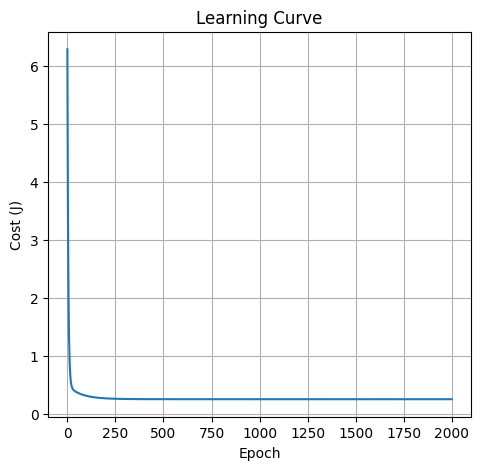

In [65]:

plt.figure(figsize=(12, 5))

# Plot 1: Learning Curve (Cost vs Epochs)
plt.subplot(1, 2, 1)
plt.plot(history)
plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Cost (J)")
plt.grid(True)
plt.show()

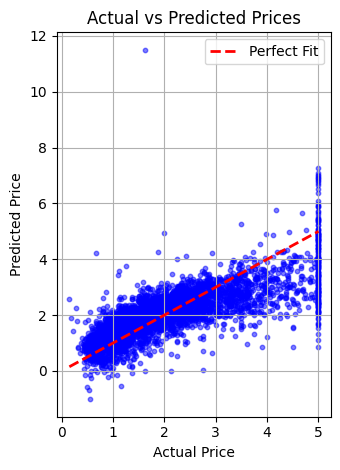

In [66]:

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_1, alpha=0.5, s=10, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

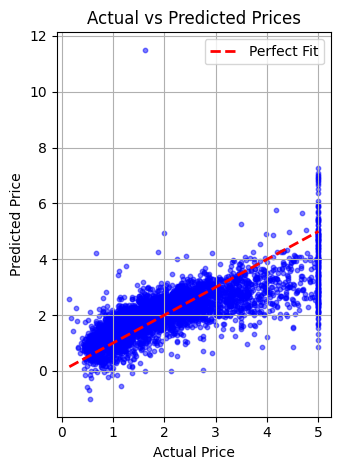

In [67]:

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_2, alpha=0.5, s=10, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()